In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [3]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr':lr}, verbose=False)
    trainer.train()
    
    return trainer.test_acc_list, trainer.train_acc_list

In [4]:
# 하이퍼 파라미터 무작위 탐색
optimization_trial = 100
results_val = {}
results_train = {}

for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # =============================================
    
    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc: " + str(val_acc_list[-1]) + " | lr: " + str(lr) + ", weight decay: " + str(weight_decay))
    key = "lr: " + str(lr) + ", weight decay: " + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc: 0.13 | lr: 0.00016160504356224305, weight decay: 2.476883760354574e-05
val acc: 0.08 | lr: 1.7391531597304605e-06, weight decay: 3.9660002344633096e-07
val acc: 0.15 | lr: 7.133896341981814e-05, weight decay: 2.850942269306214e-05
val acc: 0.07 | lr: 1.9616499574866294e-05, weight decay: 6.540172993329533e-08
val acc: 0.09 | lr: 1.1487703572636497e-05, weight decay: 2.4408099386051147e-07
val acc: 0.78 | lr: 0.008644483072296755, weight decay: 1.6570154297666384e-06
val acc: 0.18 | lr: 0.0002691694465242692, weight decay: 4.1393578315853744e-05
val acc: 0.09 | lr: 1.580005017104645e-05, weight decay: 3.021987472150487e-06
val acc: 0.07 | lr: 2.2234986207550548e-05, weight decay: 1.043343985639811e-06
val acc: 0.44 | lr: 0.002613983621532024, weight decay: 5.8379483102879435e-05
val acc: 0.08 | lr: 4.017499159429891e-05, weight decay: 1.5937479733450532e-05
val acc: 0.09 | lr: 2.5350520616017463e-06, weight decay: 1.1733506660347484e-08
val acc: 0.06 | lr: 5.924331315587894e-06

========== Hyper-Parameter Optimization Result ==========
Best- 1(Val acc: 0.78) | lr: 0.008644483072296755, weight decay: 1.6570154297666384e-06
Best- 2(Val acc: 0.78) | lr: 0.00937920111766582, weight decay: 5.392111212331582e-07
Best- 3(Val acc: 0.77) | lr: 0.006529336062159963, weight decay: 3.7205240949560097e-08
Best- 4(Val acc: 0.73) | lr: 0.0051648111247614694, weight decay: 1.199198712260992e-07
Best- 5(Val acc: 0.7) | lr: 0.008236378051118277, weight decay: 2.287014441988449e-05
Best- 6(Val acc: 0.64) | lr: 0.004129135662283895, weight decay: 1.2934478921090653e-08
Best- 7(Val acc: 0.62) | lr: 0.004597836973356435, weight decay: 2.5685789615073372e-06
Best- 8(Val acc: 0.6) | lr: 0.0035172526401661755, weight decay: 1.1143183170878137e-05
Best- 9(Val acc: 0.48) | lr: 0.0025133349105471085, weight decay: 4.472895610514653e-05
Best- 10(Val acc: 0.48) | lr: 0.0020495908243990777, weight decay: 2.6375229044007174e-07
Best- 11(Val acc: 0.47) | lr: 0.0030958037162992073, weight deca

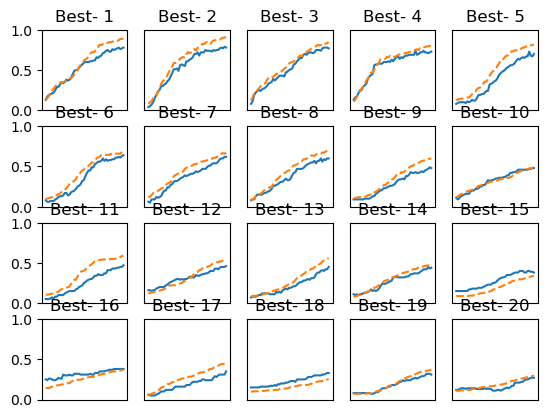

In [8]:
# 그래프 그리기
print("========== Hyper-Parameter Optimization Result ==========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best - " +str(i + 1) + "(Val acc: " + str(val_acc_list[-1]) + ") | " + key)
    
    plt.subplot(row_num, col_num, i + 1)
    plt.title("Best - " + str(i + 1))
    plt.ylim(0.0, 1.0)
    
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1
    
    if i >= graph_draw_num:
        break
        
plt.show()